# Boston Housing Prediction using KNN

#### Disclaimer: This document has 2 KNN Models.

<br>

KNN Information:
- K Nearest Neighbor
    - A supervised ML algorithm used for classification and regression. 
    
    
- What is K?
    - K is a constant defined by the user and is also the nearest neighbors distance vector.
    
    
    - For Model 1
        - Using K value from 1 - 5
            - More information explained later on.
    
    - For Model 2
        - Using the caret package, we can use knnreg() to apply KNN for this regression problem.

In [40]:
# LOAD CARET PACKAGE
library(caret)


## Data Preparation

In [41]:
# READ IN OUR DATA

boston_df <- read.csv('data.csv')

head(boston_df) # PRINT TOP 5

CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


**Remove NA Values**

We will remove NA values because running regression on empty/null values because null values from the dataset adversely affect the performance and accuracy of any machine learning algorithm.

In [42]:
# REMOVE ALL NA VALUES
na_Values <- length(which(is.na(boston_df) == T))
if(na_Values > 0){
    boston_df <- boston_df[complete.cases(boston_df),]
}

We now remove our column B

In [45]:
drop_Columns <- c('B')
boston_df <- boston_df[, !colnames(boston_df) %in% drop_Columns]

# MODEL 1 using KNN

### What does the first model consist of?


For the first model using KNN, data is set as 60% training and 40% testing.

**Why those numbers?**

In reality, there is no optimal split percentage. I chose the 60 - 40 split upon the most common split percentages:
- Train: 80%, Test: 20%
- Train: 67%, Test: 33%
- Train: 50%, Test: 50%

60 - 40 split is good for our computational cost in training the model and evaluating the model. 

In [46]:
set.seed(123)
train_index <- sample(row.names(boston_df), 0.6*dim(boston_df)[1])
testing_index <- setdiff(row.names(boston_df), train_index)

**Now we can create our training/testing dataframes**

In [50]:
train_df <- boston_df[train_index, -14]
test_df <- boston_df[testing_index, -14]

**Normalization**

Now that we have our training data, testing data, and our overall dataframe, we want to normalize our data.


Why?
Normalization will help in making sure the data is read the same way acros all records, as well as:
- Reduce Duplicate Data
- Marketing Segmentation
- Performance and Metrics



To do this, we will create different dataframes in the case we might have to go back a step. 

In [51]:
# INIT NORM. DFs
train_norm <- train_df
test_norm <- test_df
house_norm <- boston_df


norm_Values <- preProcess(train_df, method = c('center', 'scale'))
train_norm <- as.data.frame(predict(norm_Values, train_df))
test_norm <- as.data.frame(predict(norm_Values, test_df))
house_norm <- as.data.frame(predict(norm_Values, boston_df))


**Find best RMSE and K**

Now that we have our normalized data, we can create an accuracy dataframe that will hold our K value and our RMSE value.


2 questions to ask:
- *What is the best K?*

- *What is the best RMSE?*

Lets find out.

<br>


In [52]:
accuracy_df <- data.frame(k = seq(1, 5, 1), RMSE = rep(0, 5))

# compute knn for different k on validation
for(i in 1:5){
    knn.predict <- class::knn(train = train_norm[, -13], test = test_norm[, -13], cl = train_df[, 13], k = i)
    accuracy_df[i, 2] <- RMSE(as.numeric(as.character(knn.predict)), test_df[, 13])
}

In [53]:
accuracy_df

k,RMSE
1,6.936421
2,7.242346
3,7.516819
4,7.618004
5,8.323834


**What is the best K?**

For this model, we will use a K value of up to 5.

Typically, the optimal K would be the square root of the number of the training set. However, going the route of choosing a K value between 1 and 5 will help us regardless.

What can we see here in our accuracy dataframe?

Notice:
- K = 1 is the best fit because it has the lowest RMSE. 


- What does RMSE mean?
    - RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.
    - Therefore, lower values of RMSE will indicate it has a high accuracy rate of the values tried.
    
- Will choosing the K value with the lowest RMSE be the right choice? 
    - No, if we choose the K value with the best fit, then there is a high chance of overfitting. 
    - Choose the next lowest RMSE (k = 2).
    
- What does choosing the K with the second lowest RMSE indicate?
    - It means that MEDV is predicted by averaging the MEDVs for the 1 closest records. 
    - Proximity being measured by the distaance between the vectors of predictor values.

## Analysis of using this model?

Our ultimate goal is to predict MEDV, however, if we wanted to predict MEDV for thousands of new future homes, KNN prediction analysis would causes us a lot of more disadvantages then advantages. 

What is one disadvantage of using KNN to predict MEDV?

It would take too much time to make comparisons to determine the distance between each new tract and all the examples in the data. Upon doing that, it will need to average those values of its nearest neighbors to predict MEDV. 

<br>


# MODEL 2 using KNN (simplified)

As before, we will split the data into training and testing data. 

We then will extract x and y values to use for our prediction.

For this split, we will make our test data 15%. 

We then will scale our X data to improve accuracy.


In [19]:
idx = createDataPartition(boston_df$MEDV, p = .85, list = F)
train_data = boston_df[idx, ]
test_data = boston_df[-idx, ]

train_x_data = train_data[, -13]
train_x_data = scale(train_x_data)[,]
train_y_data = train_data[,13]

train_x_data = test_data[, -13]
train_x_data = scale(test_data[,-13])[,]
train_y_data = test_data[,13]

The cool thing about the caret library, it comes with a knnreg() model. We will put it our training x and y data as parameters.


This will be enough to create our model. (A Simplified model)

In [20]:
KNN_model = knnreg(train_x_data, train_y_data)

We can not use the predict().

In [22]:
pred = predict(KNN_model, data.frame(train_x_data))

Lets take a loot at our Test data and our predicted data.

In [31]:
predict_df <- data.frame(train_y_data, pred)
head(predict_df)

train_y_data,pred
36.2,33.66
19.9,21.04
21.0,19.66
13.5,25.08
24.7,22.12
21.2,21.64


We can now look at our prediction accuracy, specifically RMSE

In [26]:
rmse = caret::RMSE(train_y_data, pred)

cat("RMSE: ", rmse)

RMSE:  5.6036

**We can now plot our predictionn.**

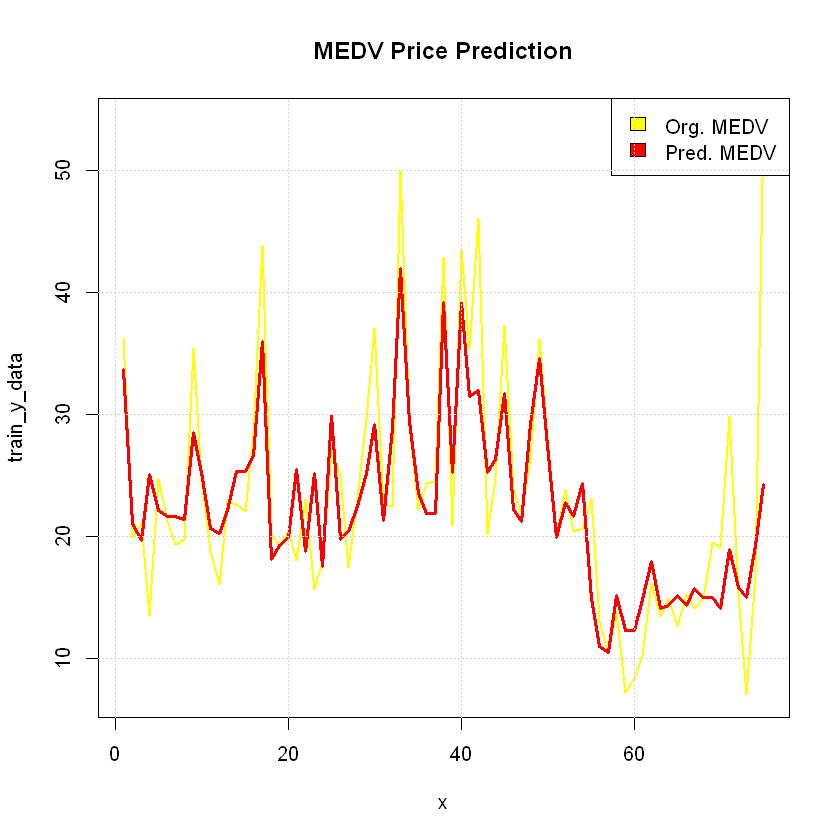

In [55]:
x = 1:length(train_y_data)

plot(x, train_y_data, col = "yellow", type = "l", lwd=2, main = "MEDV Price Prediction")
lines(x, pred, col = "red", lwd=3)
legend("topright",  legend = c("Org. MEDV", "Pred. MEDV"), fill = c("yellow", "red"), col = 2:3,  adj = c(0, 0.6))
grid()
 